<a href="https://colab.research.google.com/github/jchou03/art_era_ai/blob/main/art_era_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA UPLOAD

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
from google.colab import files
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import random
from random import sample


drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Data/art_era_ai_df.csv')
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  700 non-null    int64 
 1   Title       700 non-null    object
 2   Year        700 non-null    int64 
 3   Title_URL   700 non-null    object
 4   Image       700 non-null    object
 5   Artist      700 non-null    object
 6   Decade      700 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 38.4+ KB


In [13]:
import re
def extract_year_from_title(title):
    # Use regular expressions to find a 4-digit number in the title
    match = re.search(r'\b\d{4}\b', title)
    if match:
        year = int(match.group(0))
        return year
    else:
        match = re.search(r'(\d{4})s', title)
        if match:
          year = int(match.group(1))
          return year
        else:
          print("fail")


def getdecade(df):
  decade = []
  for i in range(len(df)):
    (title, year) = df.loc[i, "Title"], df.loc[i, "Year"]
    if year != 1972:
      decadeval = year - (year % 10)
      #print(decadeval, year)
      decade.append(decadeval)
    else:
      newyear = extract_year_from_title(title)
      decadeval = newyear - (newyear % 10)
      #print(decadeval, year)
      decade.append(decadeval)
  return decade


df['Decade'] = getdecade(df)
df = df.replace(4650, 1950)

<BarContainer object of 8 artists>

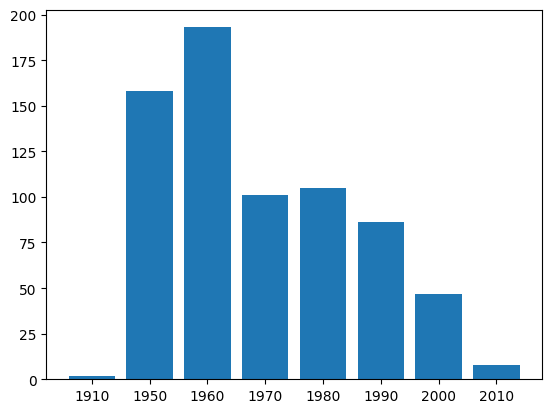

In [14]:
#df.groupby(['Decade']).count()
x = ['1910', '1950', '1960', '1970', '1980', '1990', '2000', '2010']
y = [2, 158, 193, 101, 105, 86, 47, 8]
plt.bar(x, y)

In [15]:
from pandas.core.frame import DataFrame
from IPython.display import HTML
def Create_Link(df):
  i = 0
  for x in range(len(df)):
    input = df.loc[x, "Image"]
    #index = df.loc[x, "index"]
    html = f'<a href={input}>{i}</a>'
    df = df.replace(input, html)
    i += 1
  return df


In [16]:
labels = df["Decade"]
images = df['Image']

In [17]:
sample = sample(list(images), 20)

In [ ]:
def get_largest(images):
  imageone = io.imread(images[0])
  maxwidth =  imageone.shape[1]
  maxheight = imageone.shape[0]
  for x in (images):
    image = io.imread(x)
    width =  image.shape[1]
    height = image.shape[0]
    if width > maxwidth:
        maxwidth = width
    if height > maxheight:
        maxheight = height
  return maxwidth, maxheight

def get_smallest(images):
  imageone = io.imread(images[0])
  minwidth =  imageone.shape[1]
  minheight = imageone.shape[0]
  for x in (images):
    image = io.imread(x)
    width =  image.shape[1]
    height = image.shape[0]
    if width < minwidth:
        minwidth = width
    if height < minheight:
        minheight = height
  return minwidth, minheight

print(get_largest(sample))
print(get_smallest(sample))

(600, 1113)
(600, 299)


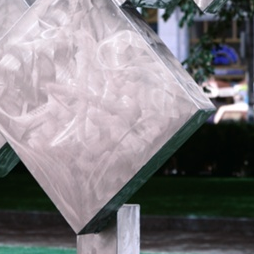

In [19]:
def resize(sample):
  crop_img_list = []
  for url in sample:
    image = io.imread(url)
    #cv2_imshow(image)
    width =  image.shape[1]
    height = image.shape[0]
    if width == height:
        #cv2_imshow(cv.resize(image, (255, 255), interpolation = cv.INTER_AREA)
        crop_img_list.append(cv.resize(image, (255, 255), interpolation = cv.INTER_AREA))
    else:
      mid_x, mid_y = int(width/2), int(height/2)
      if 255 < width:
          crop_width = int(255/2)
          if 255 < height:
              crop_height = int(255/2)
              crop_img = image[mid_y-crop_height:mid_y+crop_height, mid_x-crop_width:mid_x+crop_width]
          else:
              crop_height = int(crop_height/2)
              crop_img = image[mid_y-crop_height:mid_y+crop_height, mid_x-crop_width:mid_x+crop_width]
      else:
          if 255 < height:
              crop_width = int(crop_width/2)
              crop_height = int(255/2)
              crop_img = image[mid_y-crop_height:mid_y+crop_height, mid_x-crop_width:mid_x+crop_width]
          else:
              crop_width = int(crop_width/2)
              crop_height = int(crop_height/2)
              crop_img = image[mid_y-crop_height:mid_y+crop_height, mid_x-crop_width:mid_x+crop_width]
    crop_img_list.append(crop_img)

  return crop_img_list
    #cv2_imshow(crop_img)
    #print('\n')


result = resize(sample)
cv2_imshow(result[2])

In [ ]:
def invert_img(sample):
  for url in sample:
    image = io.imread(url)
    cv2_imshow(image)
    image = ~image
    cv2_imshow(image)

invert_img(sample)


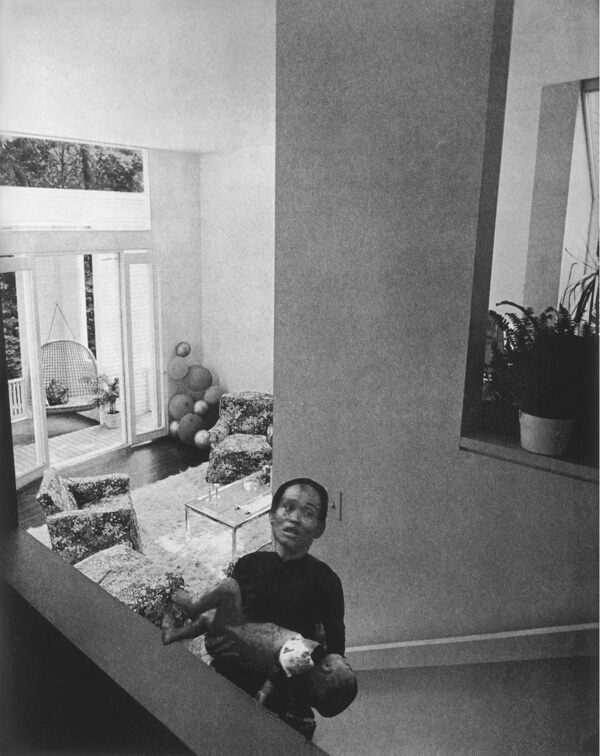

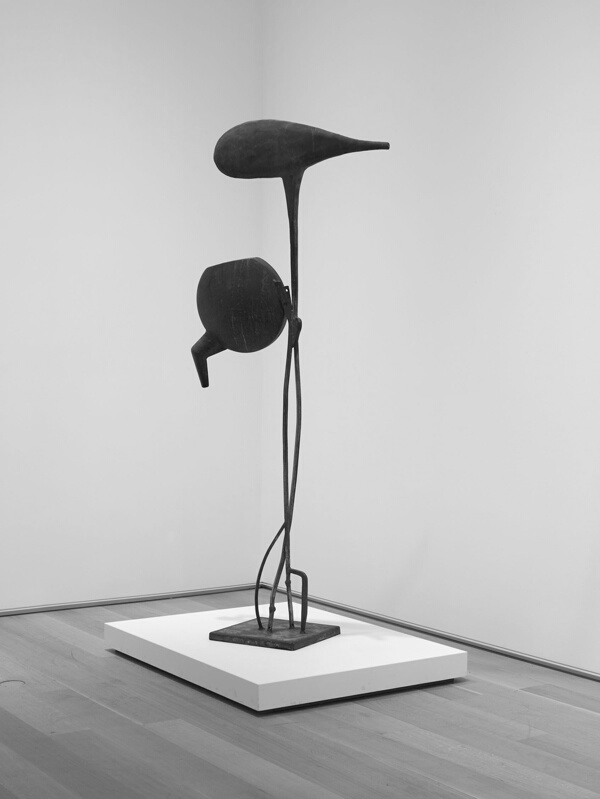

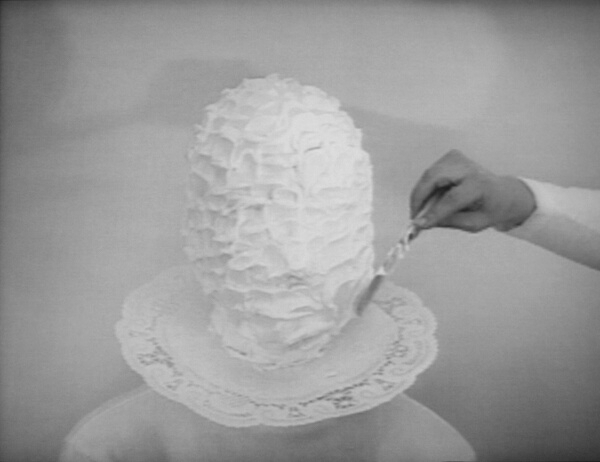

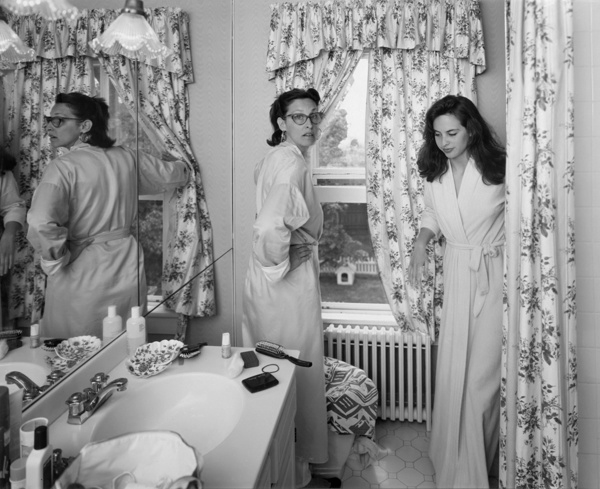

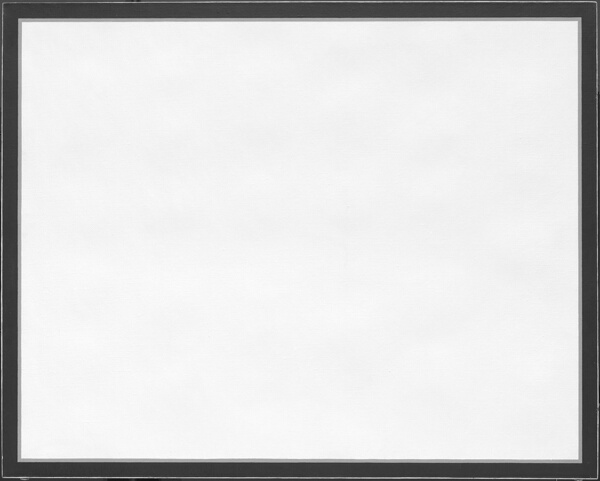

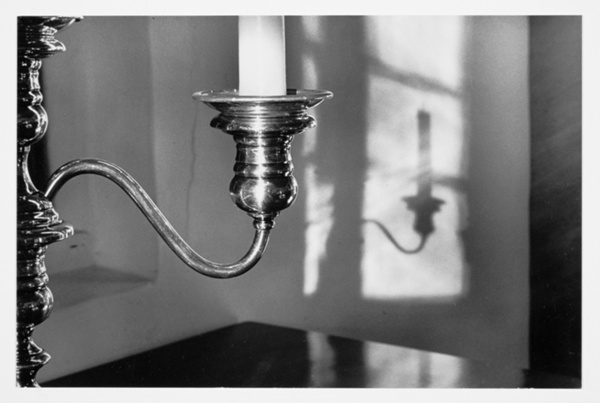

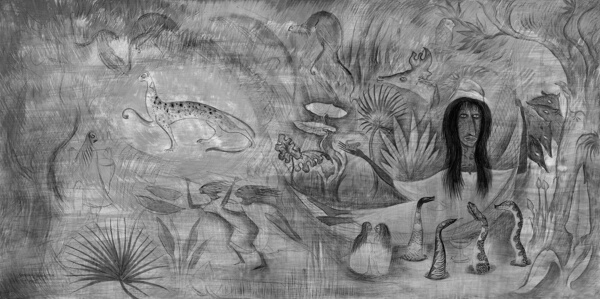

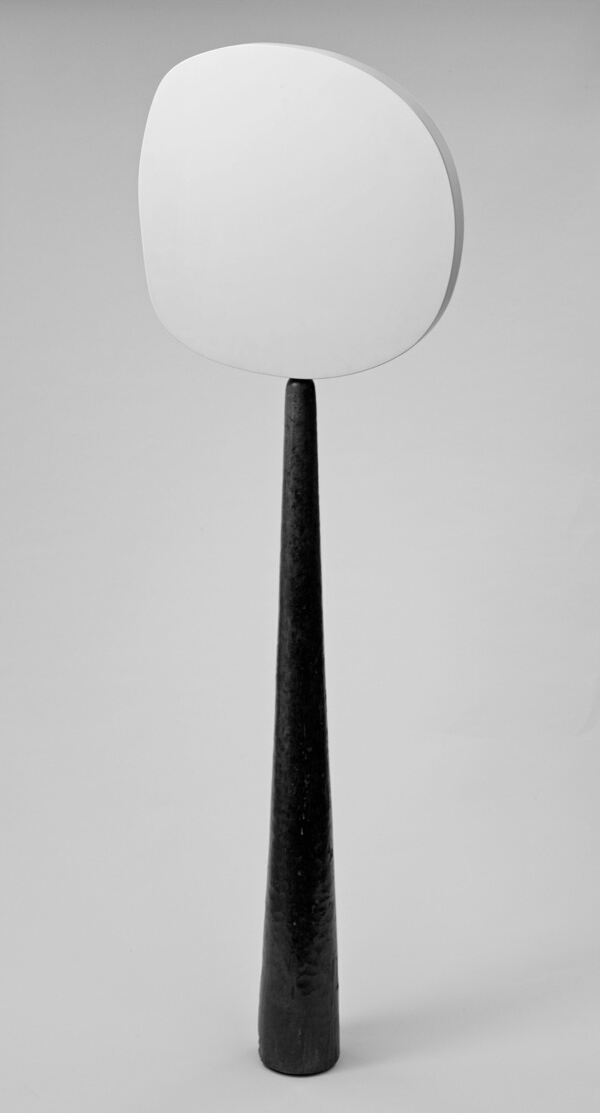

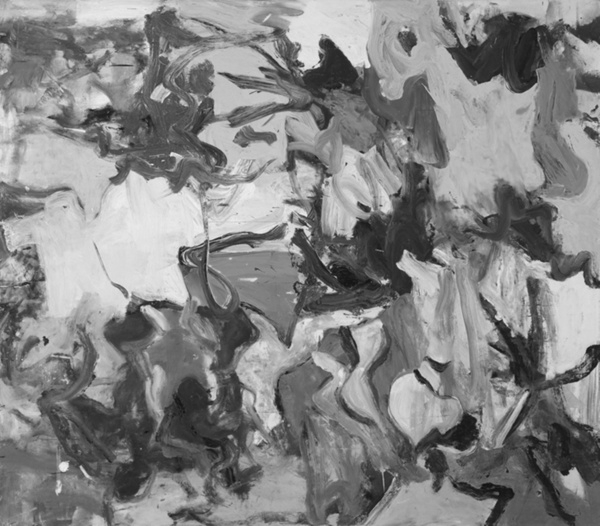

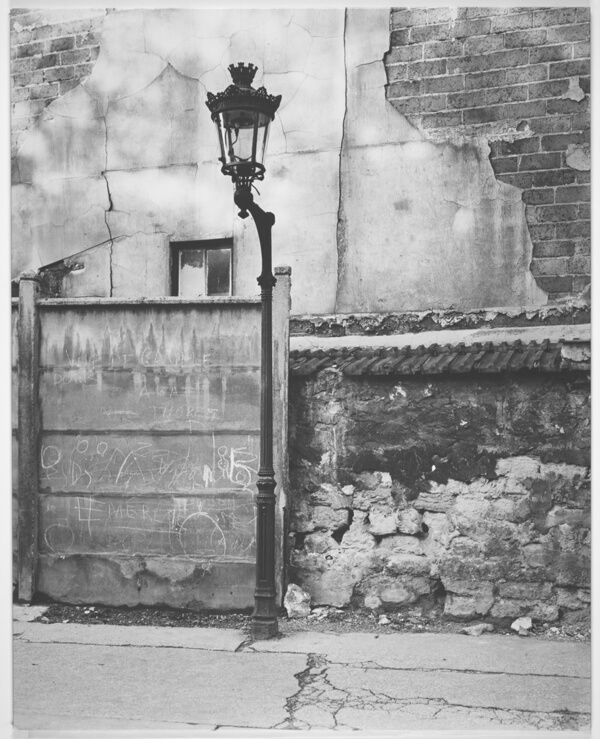

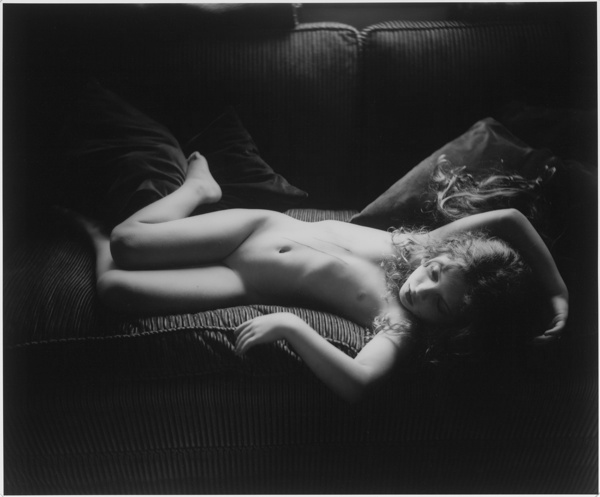

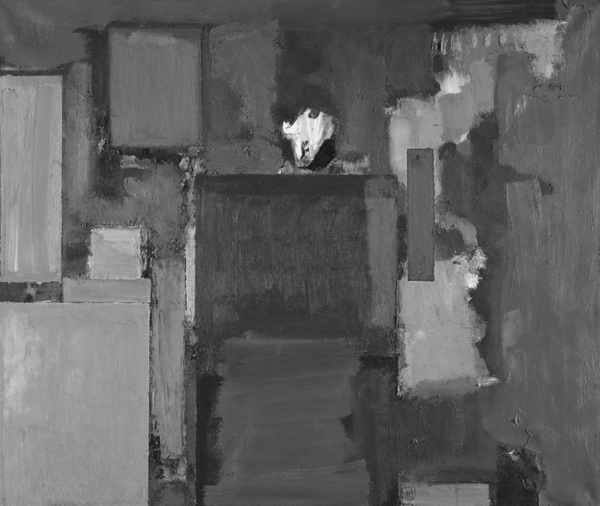

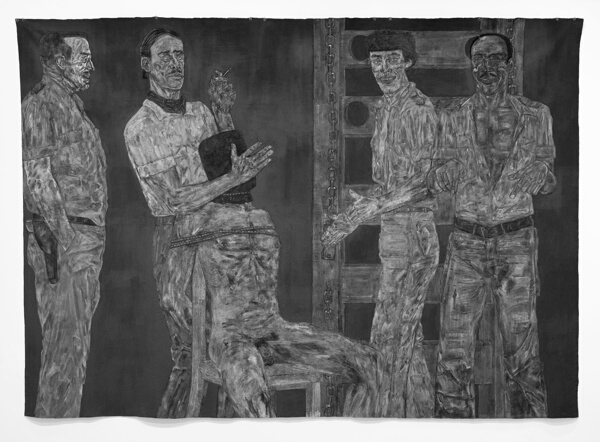

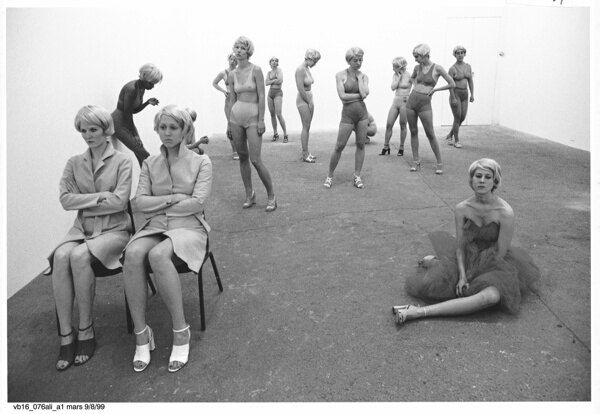

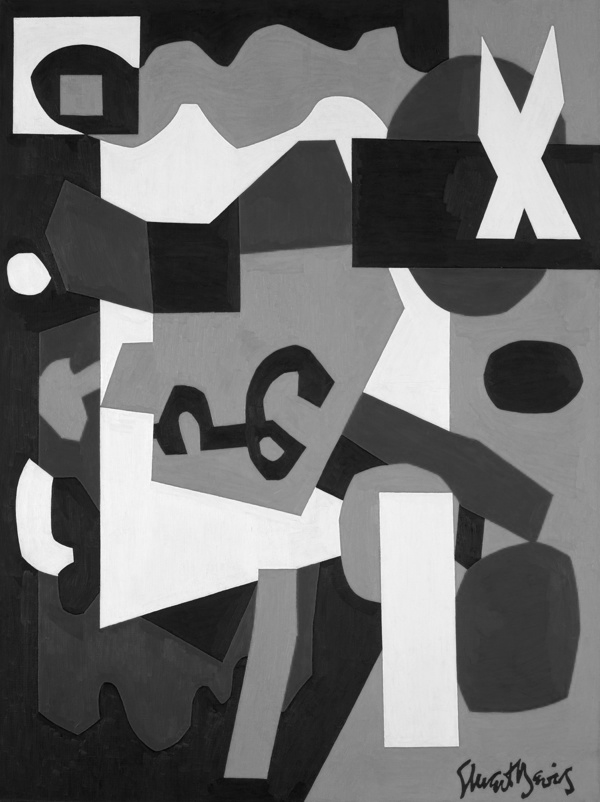

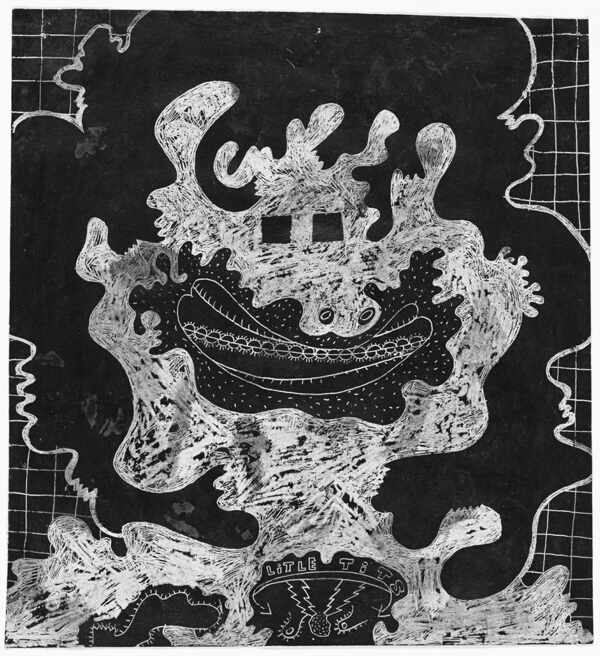

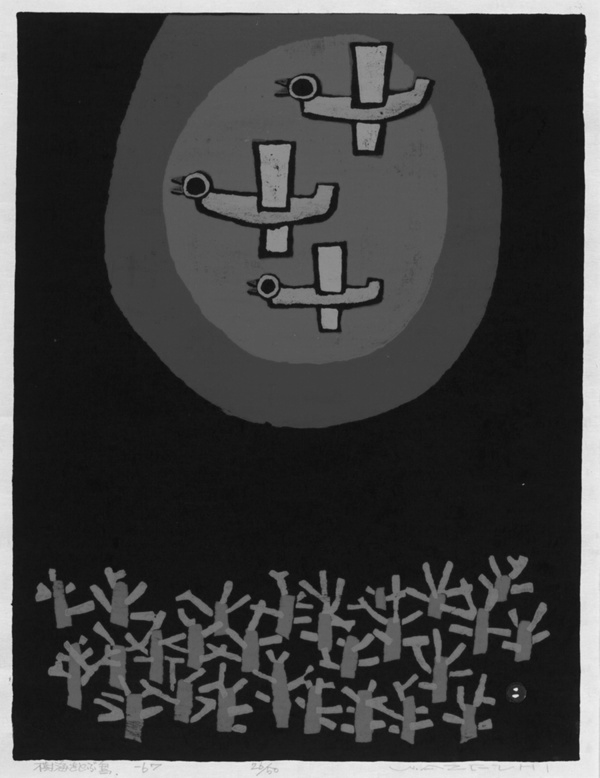

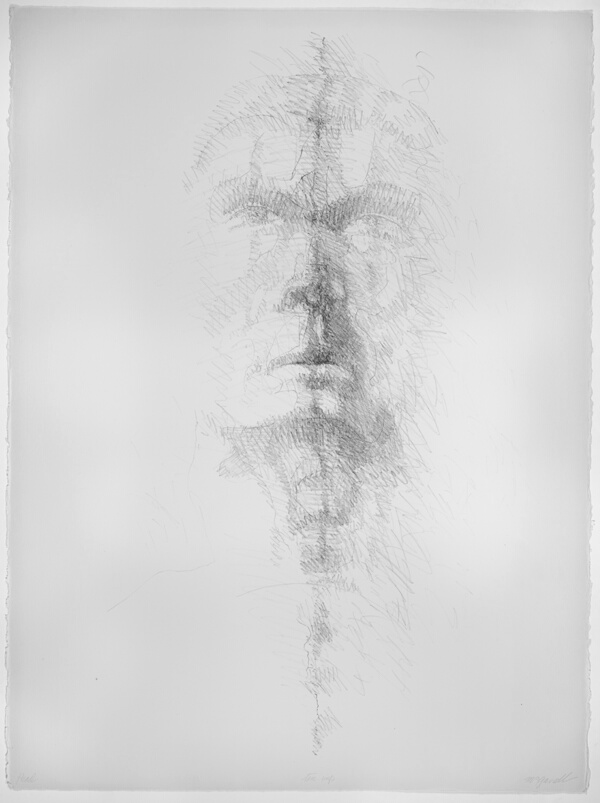

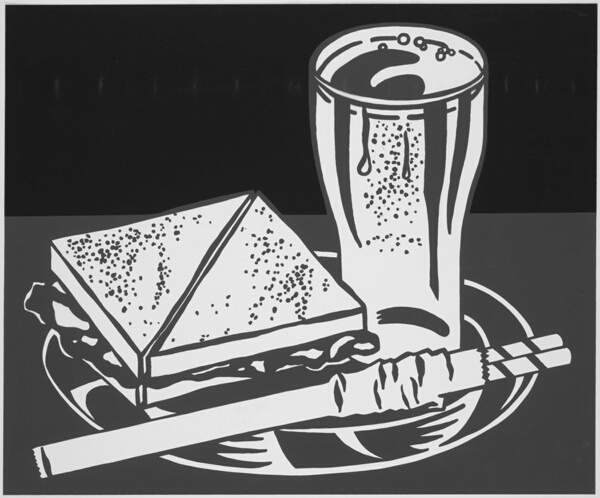

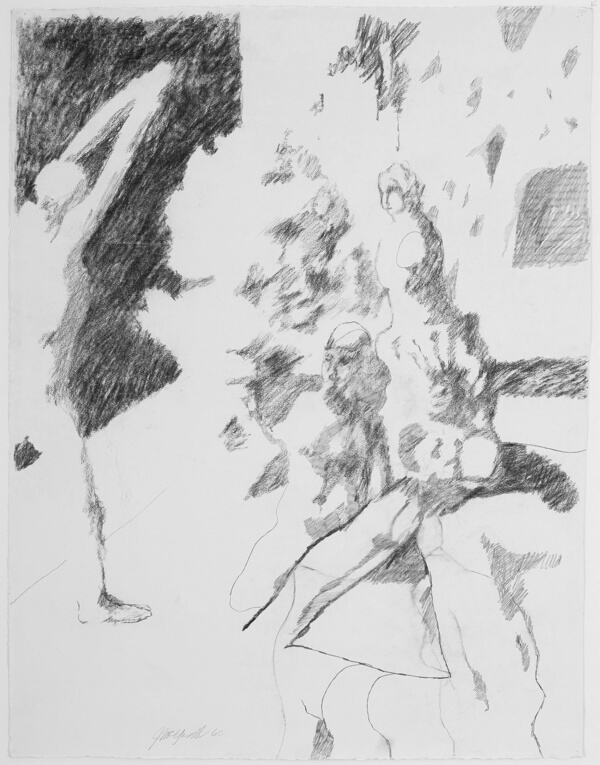

In [ ]:
def BW_convert(sample):
  for url in sample:
    image = io.imread(url)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    cv2_imshow(gray)

BW_convert(sample)

In [ ]:
def HSV_convert(sample):
  for url in sample:
    image = io.imread(url)
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    cv2_imshow(hsv)


HSV_convert(sample)

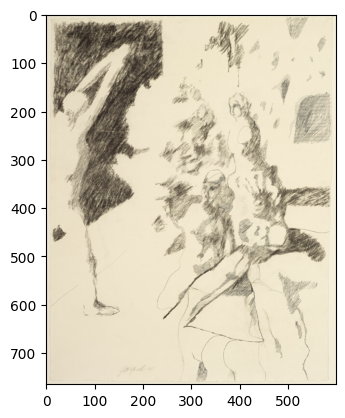

In [ ]:
def sampling(images):
  for x in images:
      image = io.imread(x)
      plt.imshow(image/255)


sampling(sample)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

x_train, x_test, y_train, y_test = train_test_split(images, labels)

x_train = resize(x_train)
x_test = resize(x_test)

x_train = x_train.reshape((-1,28,28)) #NOT SURE IF WE NEED
x_test = x_test.reshape((-1,28,28)) #NOT SURE IF WE NEED

num_classes = 8
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

